<a href="https://colab.research.google.com/github/saad1ibn2akhter/AI_Olympiad_problems_and_solutions/blob/main/supervised_learning_classification_decision_regression_trees__SVM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [86]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler , OneHotEncoder , LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsOneClassifier , OneVsRestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier,  plot_tree

In [87]:
df = pd.read_csv('obesity.csv')
df.head(1)

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight


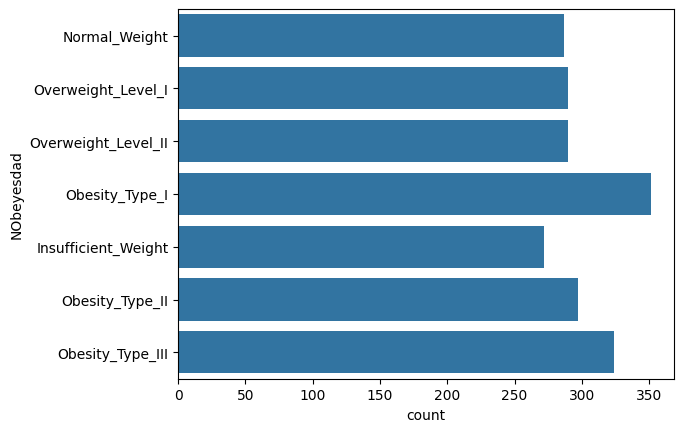

In [88]:
sns.countplot( y =df['NObeyesdad'], data = df)
plt.show()

In [89]:
#process the float64 values and standardize
cont_cols = df.select_dtypes(include='float64').columns.tolist()
print(cont_cols)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[cont_cols])

scaled_df = pd.DataFrame(scaled_features , columns = scaler.get_feature_names_out(cont_cols))
scaled_df.head(1)

scaled_df = pd.concat([df.drop(columns=cont_cols) , scaled_df], axis=1)
scaled_df.head(1)
#DONE


['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


,Gender,family_history_with_overweight,FAVC,CAEC,SMOKE,SCC,CALC,MTRANS,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE
0,Female,yes,no,Sometimes,no,no,no,Public_Transportation,Normal_Weight,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997


In [90]:
#process categorical features

cat_cols = scaled_df.select_dtypes(include=['object']).columns.tolist()
cat_cols.remove('NObeyesdad')
print(cat_cols)

encoder = OneHotEncoder(sparse_output= False , drop='first')
encoded_features = encoder.fit_transform(scaled_df[cat_cols])

encoded_df = pd.DataFrame(encoded_features , columns=encoder.get_feature_names_out(cat_cols))

final_df = pd.concat([scaled_df.drop(columns=cat_cols) , encoded_df],axis=1)

#process the target variable NObeyesdad

final_df['NObeyesdad']  = final_df['NObeyesdad'].astype('category').cat.codes

final_df.head(10)




['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS']


,NObeyesdad,Age,Height,Weight,FCVC,NCP,CH2O,FAF,TUE,Gender_Male,...,CAEC_no,SMOKE_yes,SCC_yes,CALC_Frequently,CALC_Sometimes,CALC_no,MTRANS_Bike,MTRANS_Motorbike,MTRANS_Public_Transportation,MTRANS_Walking
0,1,-0.522124,-0.875589,-0.862558,-0.785019,0.404153,-0.013073,-1.188039,0.561997,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1,-0.522124,-1.947599,-1.168077,1.088342,0.404153,1.618759,2.339750,-1.080625,0.0,...,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,1,-0.206889,1.054029,-0.366090,-0.785019,0.404153,-0.013073,1.163820,0.561997,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,5,0.423582,1.054029,0.015808,1.088342,0.404153,-0.013073,1.163820,-1.080625,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
4,6,-0.364507,0.839627,0.122740,-0.785019,-2.167023,-0.013073,-1.188039,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
5,1,0.738817,-0.875589,-1.282647,-0.785019,0.404153,-0.013073,-1.188039,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,1,-0.206889,-2.162001,-1.206267,1.088342,0.404153,-0.013073,-0.012109,-1.080625,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
7,1,-0.364507,-0.661187,-1.282647,-0.785019,0.404153,-0.013073,2.339750,-1.080625,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
8,1,-0.049271,0.839627,-0.862558,1.088342,0.404153,-0.013073,-0.012109,0.561997,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9,1,-0.364507,0.196421,-0.709799,-0.785019,0.404153,-0.013073,-0.012109,0.561997,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [91]:
X = final_df.drop(columns=['NObeyesdad'])
y = final_df['NObeyesdad']

X_train , X_test , y_train , y_test = train_test_split(X,y,test_size=0.3 , random_state=42)

In [92]:
# 1 vs 1
ovo = OneVsOneClassifier(LogisticRegression( max_iter=1000))
ovo.fit(X_train,y_train)
ovo_yhat = ovo.predict(X_test)

ovo_accuracy = accuracy_score(y_test, ovo_yhat)
print("1 vs. 1  accuracy : ",ovo_accuracy *100," %")

# 1 vs. all
ova = OneVsRestClassifier(LogisticRegression(max_iter =1000))
ova.fit(X_train , y_train)
ova_yhat = ova.predict(X_test)

ova_accuracy = accuracy_score(y_test , ova_yhat)
print("1 vs. rest accuracy : ",ova_accuracy*100 ," %")




1 vs. 1  accuracy :  92.74447949526814  %
1 vs. rest accuracy :  75.39432176656152  %


In [93]:
#DECISION TREE part

drug_df = pd.read_csv('drug200.csv')
drug_df.head(1)

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,drugY


In [94]:
label_encoder = LabelEncoder()
drug_df['Sex'] = label_encoder.fit_transform(drug_df['Sex'])
drug_df['BP'] = label_encoder.fit_transform(drug_df['BP'])
drug_df['Drug'] = label_encoder.fit_transform(drug_df['Drug'])
drug_df['Cholesterol'] = label_encoder.fit_transform(drug_df['Cholesterol'])

print(drug_df['Drug'].dtype)
drug_df.head(10)



int64


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,0,0,0,25.355,4
1,47,1,1,0,13.093,2
2,47,1,1,0,10.114,2
3,28,0,2,0,7.798,3
4,61,0,1,0,18.043,4
5,22,0,2,0,8.607,3
6,49,0,2,0,16.275,4
7,41,1,1,0,11.037,2
8,60,1,2,0,15.171,4
9,43,1,1,1,19.368,4


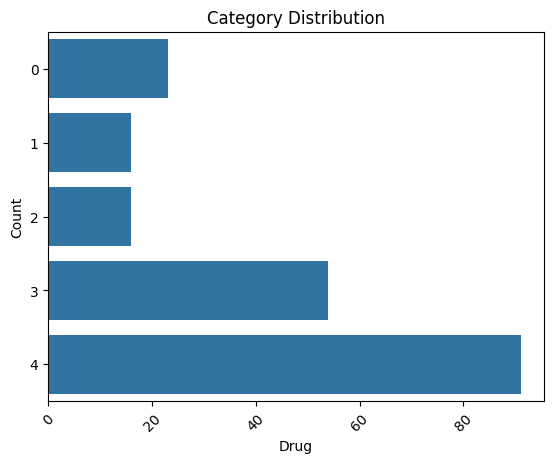

In [95]:
sns.countplot(y = drug_df['Drug'] , data = drug_df)
plt.xlabel('Drug')
plt.ylabel('Count')
plt.title('Category Distribution')
plt.xticks(rotation=45)
plt.show()

In [96]:
X = drug_df.drop(columns =['Drug'])
y =drug_df['Drug']
X_train , X_test, y_train , y_test = train_test_split(X,y,test_size = 0.3 , random_state=42)

In [97]:
drug_tree = DecisionTreeClassifier(criterion='entropy' ,max_depth =4)

drug_tree.fit(X_train , y_train )

tree_yhat = drug_tree.predict(X_test)
tree_accuracy = accuracy_score(y_test, tree_yhat)

print(f"Decision Tree Accurracy : {tree_accuracy*100} %")

Decision Tree Accurracy : 100.0 %


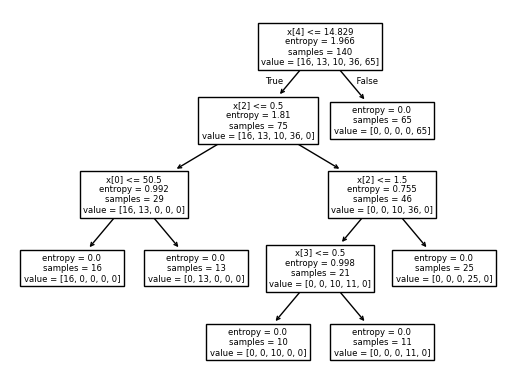

In [99]:
plot_tree(drug_tree)
plt.show()